In [199]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [146]:
#lets import the data and check if it loaded correctly
df = pd.read_csv(r"C:\Users\USER\Documents\Datasets\archive (15)\global_tech_salary.txt")
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M


In [147]:
# lets check the general info of the data and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [148]:
# create a new column for easy interpretation of the remote ratio column
df['work_type'] = df['remote_ratio'].apply(lambda x: 'Onsite' if x== 0 else 'Hybrid' if x== 50 else 'Remote')

In [149]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_type
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M,Onsite
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M,Remote
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M,Remote
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M,Onsite
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M,Onsite


##### There are 5000 records with no null values

In [150]:
# lets check for duplicated values
df.duplicated().sum()

1144

In [151]:
# then lets drop them 
df.drop_duplicates(inplace = True)

# EDA

In [152]:
df.work_year.value_counts()

work_year
2023    2088
2024    1237
2022     427
2021      79
2020      25
Name: count, dtype: int64

<Axes: xlabel='work_year'>

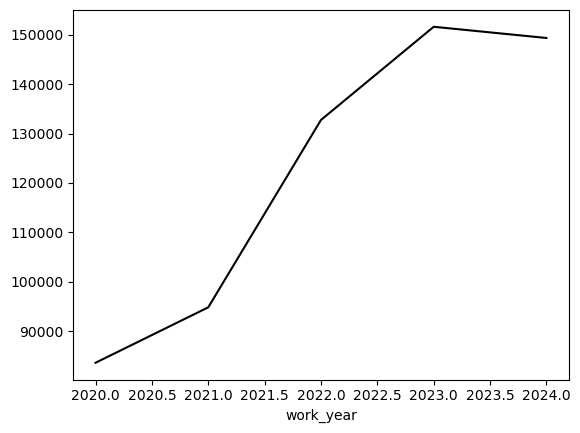

In [153]:
df.groupby('work_year')['salary_in_usd'].mean().plot(color = 'black')

In [154]:
df.groupby('work_year')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,25.0,83558.440000,86119.768917,15000.0,42000.0,60000.0,106000.0,450000.0
2021,79.0,94792.974684,58646.981515,16228.0,54547.0,81000.0,132500.0,276000.0
2022,427.0,132758.704918,57752.370690,18314.0,90160.0,130000.0,175000.0,380000.0
2023,2088.0,151637.779215,67527.055671,15680.0,105000.0,143225.0,190125.0,750000.0
2024,1237.0,149369.504446,73246.603818,21600.0,96750.0,139500.0,185800.0,720000.0


#### The number of jobs in total has seen an exponential increase over the years with the average salary increasing with it also with a slight decrease in 2024

In [155]:
df.job_title.value_counts()

job_title
Data Engineer                 768
Data Scientist                758
Data Analyst                  542
Machine Learning Engineer     366
Analytics Engineer            123
                             ... 
Data Quality Engineer           1
Principal Data Analyst          1
Data Integration Developer      1
Lead Data Analyst               1
Data Modeller                   1
Name: count, Length: 123, dtype: int64

#### Data Engineer, followed by data scientist and analyst are the top 3 popular jobs over the years based on the data set

<Axes: xlabel='work_year'>

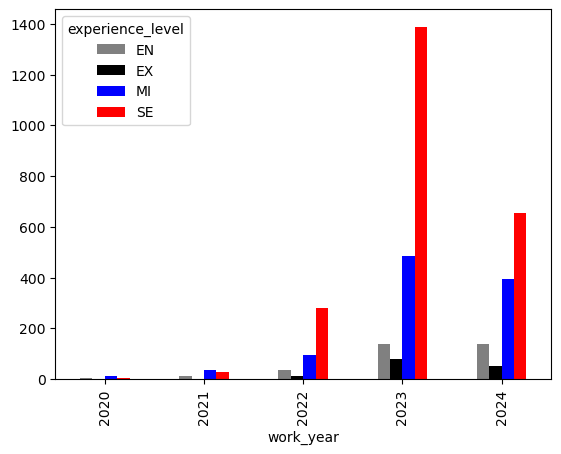

In [156]:
df.groupby('work_year')['experience_level'].value_counts().unstack().plot(kind = 'bar', color = ['grey', 'black', 'blue', 'red'])

##### There was an exponetial increase in experience level in both middle level and senior level in 2023 with it taking a dive in 2024, the increase could be as a result of more people entering into the tech industry in that year and those in the previous levels collectively bing promoted or applying for a seniour role,

<Axes: xlabel='work_year'>

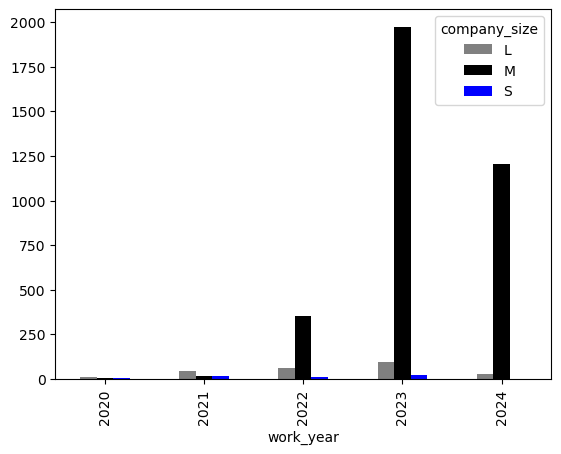

In [157]:
df.groupby('work_year')['company_size'].value_counts().unstack().plot(kind = 'bar', color = ['grey', 'black', 'blue'])

##### Just like the the experience level, 2023 got a drastice increase in either the founding of middle scale companies or small scale companies seeing a drastic growth, but for a reason 2024 saw a decrease in it, this needs to be analyzed 

##### The result of the above insights is subjected to more reviews as the dataset provided is not extensive enough to show all information globally as a sample of 5000 is lacking

In [158]:
df.groupby('work_year')['employment_type'].value_counts().unstack()

employment_type,CT,FL,FT,PT
work_year,,,,
2020,2.0,NaN,22.0,1.0
2021,1.0,1.0,76.0,1.0
2022,2.0,1.0,423.0,1.0
2023,3.0,3.0,2080.0,2.0
2024,2.0,1.0,1230.0,4.0


###### There are more fulltime roles taken in 2023 than all years combined,

<Axes: xlabel='work_year'>

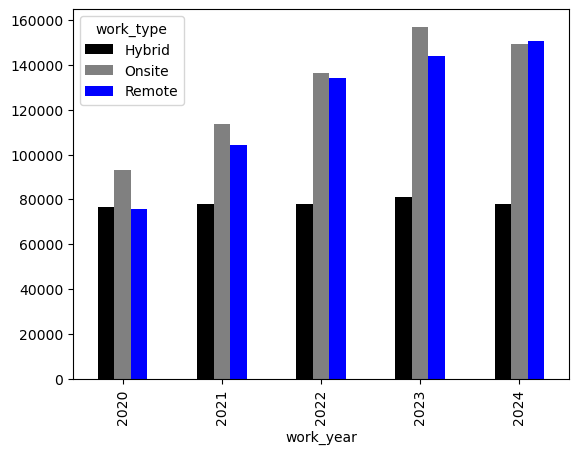

In [159]:
df.groupby(['work_year','work_type'])['salary_in_usd'].mean().unstack().plot(kind = 'bar', color = ['black', 'grey', 'blue'])

<Axes: ylabel='work_type'>

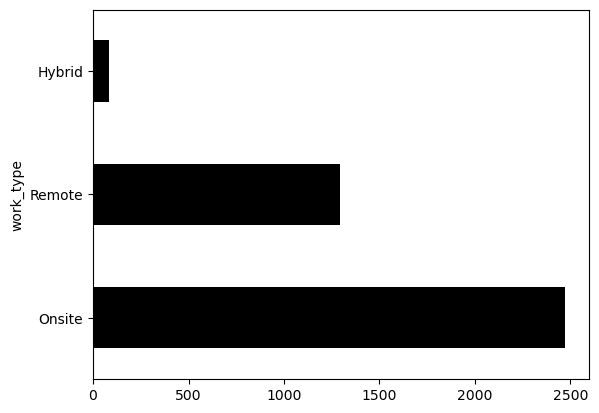

In [160]:
df.work_type.value_counts().plot(kind = 'barh', color = 'black')

<Axes: ylabel='experience_level'>

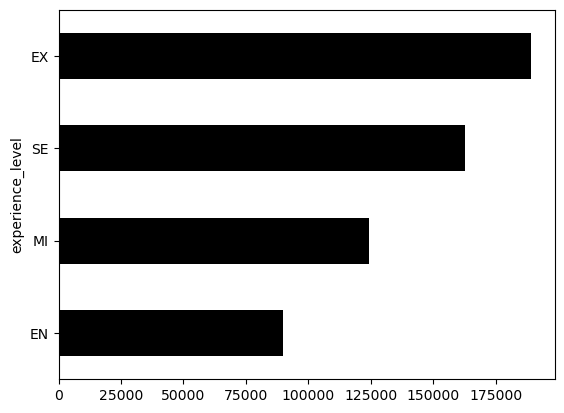

In [161]:
# checking what exxperience level has the highest average salary 
df.groupby('experience_level')['salary_in_usd'].mean().sort_values().plot(kind = 'barh', color = 'black')

In [172]:
df.groupby('job_title')['salary_in_usd'].mean().nlargest(5)

job_title
Lead Data Engineer                    276000.0
AWS Data Architect                    258000.0
Head of Machine Learning              255461.8
Director of Data Science              253489.7
Machine Learning Software Engineer    220760.0
Name: salary_in_usd, dtype: float64

#### Top job roles with the highest pay

In [162]:
# saving the clean data for visualization in power bi or tablue
df.to_csv('Clean_tech.csv')


# Machine Learning

##### Delving into the machine learning part, we would be droping some columns that are not relvant to this part also removing outliers and scaling the data and more 

In [205]:
data = df.copy(deep = True)

<Axes: >

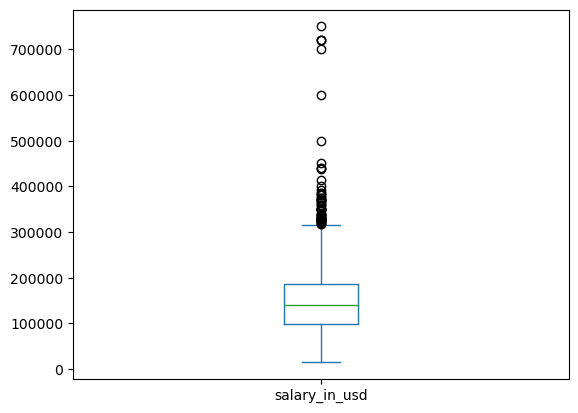

In [206]:
data.salary_in_usd.plot(kind = 'box')

In [207]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_type
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M,Onsite
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M,Remote
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M,Remote
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M,Onsite
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M,Onsite


In [208]:
data.drop(['salary', 'salary_currency', 'remote_ratio', 'employee_residence'],axis = 1, inplace = True)

In [209]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,work_type
0,2023,MI,FT,Data Analyst,165000,AU,M,Onsite
1,2023,MI,FT,Data Analyst,70000,US,M,Remote
2,2024,MI,FT,Machine Learning Engineer,94444,IE,M,Remote
3,2024,SE,FT,Data Scientist,92700,US,M,Onsite
4,2023,MI,FT,Research Engineer,150000,US,M,Onsite
...,...,...,...,...,...,...,...,...
4993,2023,SE,FT,ML Engineer,152000,US,M,Onsite
4994,2024,MI,FT,AI Engineer,151000,US,M,Onsite
4995,2023,SE,FT,Machine Learning Infrastructure Engineer,75577,FR,M,Remote
4997,2024,SE,FT,Machine Learning Engineer,153000,US,M,Onsite


In [210]:
cols_to_encode = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size', 'work_type']
encoder = OrdinalEncoder()

data[cols_to_encode] = encoder.fit_transform(data[cols_to_encode])

In [211]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,work_type
0,2023,2.0,2.0,34.0,165000,5.0,1.0,1.0
1,2023,2.0,2.0,34.0,70000,52.0,1.0,2.0
2,2024,2.0,2.0,98.0,94444,24.0,1.0,2.0
3,2024,3.0,2.0,73.0,92700,52.0,1.0,1.0
4,2023,2.0,2.0,115.0,150000,52.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4993,2023,3.0,2.0,94.0,152000,52.0,1.0,1.0
4994,2024,2.0,2.0,2.0,151000,52.0,1.0,1.0
4995,2023,3.0,2.0,99.0,75577,19.0,1.0,2.0
4997,2024,3.0,2.0,98.0,153000,52.0,1.0,1.0


In [212]:
scaler = StandardScaler()

In [214]:
data['salary_in_usd'] = scaler.fit_transform(data[['salary_in_usd']])

In [215]:
X = data.drop('salary_in_usd', axis = 1)
y = data['salary_in_usd']

In [216]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [232]:
model = RandomForestRegressor(n_estimators = 100, max_depth= 10, min_samples_leaf= 1, min_samples_split= 10,)

In [233]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10)

In [234]:
prediction = model.predict(X_test)

In [235]:
prediction

array([ 0.29012505,  0.07337276, -1.3279791 , ..., -0.87708166,
        0.81325471,  0.46231992])

In [236]:
mae = mean_absolute_error(y_test, prediction)  # Measures absolute error
mse = mean_squared_error(y_test, prediction)  # Penalizes large errors
r2 = r2_score(y_test, prediction)  # Measures how well model explains variance

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.608612075172589
MSE: 0.6335905726166162
RMSE: 57731.35015662632
R² Score: 0.31679544554211825


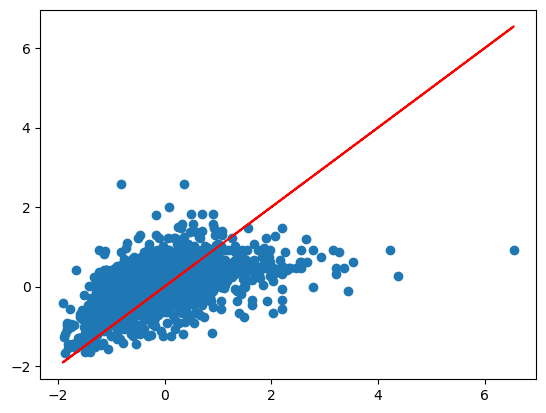

In [230]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, color = 'red')

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
